# MACHINE LEARNING LAB

## EXERCISE 1.2

### Aim : 
Use the data1.csv to build a simple linear regression from scratch without using sklearn libraries and print the RMSE and mean absolute error values. Use both the equations available in the slides (in theory page) to build the model and compare the intercept and coefficient values.

### Algorithm : 

1. **Initialize Variables**: 
   - Initialize variables `X_max`, `X_min`, `X_mean`, and `y_mean` to `None` or `0`.
   - Determine the length of the dataset `n`.

2. **Calculate Mean and Extremes**: 
   - Iterate through each row of the dataset.
   - Update `X_max` and `X_min` with the maximum and minimum `x` values encountered.
   - Calculate the sums of `x` and `y` values to compute their means.

3. **Calculate Slope and Intercept**:
   - Compute the means of `x` and `y`.
   - Calculate the numerator and denominator of the slope formula using the dataset's `x` and `y` values.
   - Calculate the slope `m` and intercept `c` using the obtained numerator and denominator.

4. **Compute Errors**:
   - Initialize variables for Root Mean Squared Error (`RMSE`) and Mean Absolute Error (`MAE`) to 0.
   - Iterate through each data point in the dataset.
   - Compute the squared difference between the actual `y` value and the predicted `y` value using the linear regression equation to update `RMSE`.
   - Compute the absolute difference between the actual `y` value and the predicted `y` value to update `MAE`.

5. **Calculate Summary Statistics**:
   - Compute the mean values of `RMSE` and `MAE`.
   - Calculate the predicted `y` values corresponding to the minimum and maximum `x` values.
   - Return the slope `m`, intercept `c`, Root Mean Squared Error `RMSE`, Mean Absolute Error `MAE`, minimum `x` value `X_min`, minimum `y` value `y_min`, maximum `x` value `X_max`, and maximum `y` value `y_max`.

### Code and Output : 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data=pd.read_csv(r"C:\Users\TEJU\Downloads\data1 (1).csv")

In [37]:
data.head()

,x,y
0,17,94
1,13,73
2,12,59
3,15,80
4,16,93


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       120 non-null    int64
 1   y       120 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [39]:
#Function for calculating absolute value of a number
def abs(x):
    if x>0:
        return x
    else:
        return -x

In [44]:
#Function for computing linear regression
def LinearRegression(data):
    X_max=None
    X_min=None
    X_mean=0
    y_mean=0
    n=len(data)
    
    for i in range(0,n):
        #All the first column values(0), one by one
        x=data.iloc[i,0]
        if(X_max==None):
            X_max=x
        elif(x>X_max):
            X_max=x
        if(X_min==None):
            X_min=x
        elif(x<X_min):
            X_min=x
        
        #All the second column values (1),one by one
        y=data.iloc[i,1]
        X_mean=x+X_mean
        y_mean=y+y_mean
        
    #calculating final value of X mean and y mean
    X_mean=X_mean/n
    y_mean=y_mean/n
        
    numerator=0
    denominator=0
    
    for i in range(0,n):
        #Applying formula : summation of xy-ymeanx/summation of xsquare-xmeanx
        x=data.iloc[i,0]
        y=data.iloc[i,1]
        numerator=numerator+((x*y)-(y_mean*x))
        denominator = denominator + ((x * x) - (X_mean * x))
    
    slope=numerator/denominator
    #y=mx+c
    c=y_mean-(slope*X_mean)
    
    #Calculating root mean square error and mean absolute error
    RMSE=0
    MAE=0
    for i in range(0,n):
        x=data.iloc[i,0]
        y=data.iloc[i,1]
        #rmse is summation of (y-mx+c)^2
        RMSE=RMSE+((y-((slope*x)+c))**2)
        #mae is the summation of abs of y-mx+c
        MAE=MAE+abs(y-((slope*x)+c))
    #rmse is root of rmse/n
    RMSE=RMSE/n
    RMSE=RMSE**(0.5)
    #mae is mae/n
    MAE=MAE/n
    #Calculating y_min and y_max (the two end points)
    y_min=(slope*X_min)+c
    y_max=(slope*X_max)+c
    return slope, c, RMSE, MAE, X_min, y_min, X_max, y_max

In [45]:
slope, c, RMSE, MAE, x1, y1, x2, y2 = LinearRegression(data)

Text(0.5, 0, 'X')

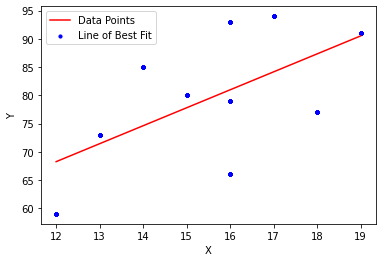

In [46]:
plt.figure()
plt.scatter(data.iloc[:,0],data.iloc[:,1],s=10,c='blue')
plt.plot([x1,x2],[y1,y2],color='red')
plt.legend(['Data Points','Line of Best Fit'])
plt.ylabel("Y")
plt.xlabel("X")

In [47]:
print("Line equation is: y = " + str(slope) + "*x + " + str(c))
print("Slope 'm' is: " + str(slope))
print("Constant 'c' is: " + str(c))
print("RMSE: " + str(RMSE))
print("Mean Absolute Error: " + str(MAE))

Line equation is: y = 3.179245283018851*x + 30.10377358490593
Slope 'm' is: 3.179245283018851
Constant 'c' is: 30.10377358490593
RMSE: 8.817810022046611
Mean Absolute Error: 7.305660377358496


### Results : 
Therefore, we were succesfully able to implement linear regression from scratch and get the line equation, rmse, mae, slope and intercept values